## САМОСТОЯТЕЛЬНАЯ РАБОТА. АНСАМБЛИ. СТОХАСТИЧЕСКИЕ МОДЕЛИ


**Дано**: Имеется набор данных из системы поискового антиспама.

**Требуется**: 

- Построить классификатор для представленных данных на основе алгоритма Random Forest. 
- Провести сравнение данного метода с известными алгоритмами классификации. 
- Ответить на вопросы.

Пошаговая инструкция:

1. Скачать данные и запустить шаблон кода на python
```
python rf.py -h
python rf.py -tr spam.train.txt -te spam.test.txt
```
2. Сравнить RF c другими известными алгоритмами классификации.

3. Написать функцию, подбирающую параметры числа деревьев и процента признаков в деревьях. Построить график.

4. Ответить на вопрос: Почему качество классификации для класса spam выше, чем для класса notspam?

5. Приложить ссылку на своё решение в поле ниже. Позднее ментор даст вам обратную связь.

1.

In [1]:
!python rf.py -h

usage: rf.py [-h] [-tr TRAIN] [-te TEST] [-t TREES] [-fp FEATURES_PERCENT]

Random Forest Tutorial

optional arguments:
  -h, --help            show this help message and exit
  -tr TRAIN, --train TRAIN
                        Train file name
  -te TEST, --test TEST
                        Test file name
  -t TREES, --trees TREES
                        Number of trees in random forest
  -fp FEATURES_PERCENT, --features_percent FEATURES_PERCENT
                        Percent of features in each tree


In [3]:
!python rf.py -tr spam.train.txt -te spam.test.txt

Figure(800x800)
             precision    recall  f1-score   support

        0.0    0.60462   0.87555   0.71529      2033
        1.0    0.96443   0.85492   0.90638      8023

avg / total    0.89168   0.85909   0.86774     10056
final score    0.78452   0.86524   0.81083     10056



2. Сравнение RF c другими алгоритмами классификации (логистическая регрессия, NB, KNN, SVM, решающее дерево)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# Import the random forest package
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from rf import visualize_data, classification_report
from tqdm import tqdm

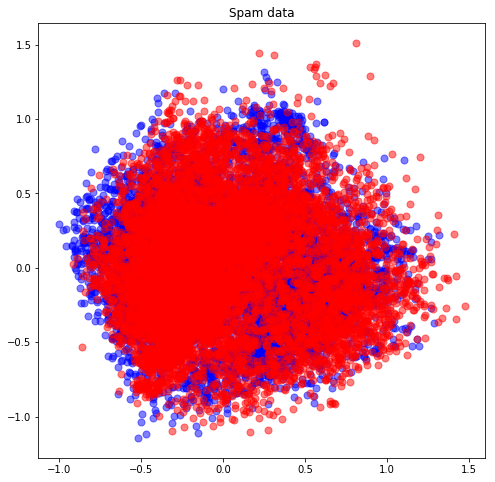

In [23]:
train_data = np.loadtxt("spam.train.txt")
test_data  = np.loadtxt("spam.test.txt")

total_data = np.concatenate(([train_data, test_data]), axis=0)

visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

number_of_features = len(train_data[0, :])

In [19]:
from sklearn.decomposition import PCA

def visualize_classes(data, title):
    pca = PCA(n_components=2)
    projection = pca.fit_transform(data[:,1:])
    projection_spam = projection[data[:,0] == 1]
    projection_notspam = projection[data[:,0] == 0]

    plt.plot(projection_spam[:, 0], projection_spam[:, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='spam')
    plt.plot(projection_notspam[:, 0], projection_notspam[:, 1],
            'o', markersize=7, color='red', alpha=0.5, label='not_spam')
    plt.legend(loc='best')
    plt.title(title)

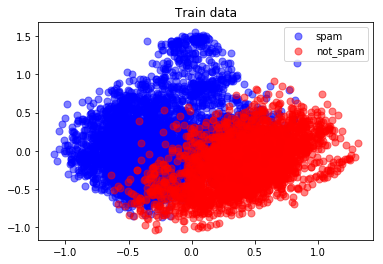

In [20]:
visualize_classes(train_data, "Train data")

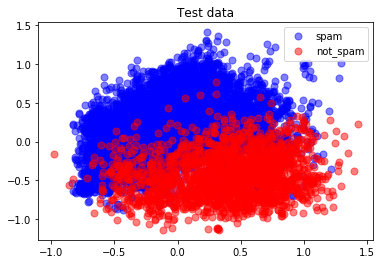

In [21]:
visualize_classes(test_data, "Test data")

In [37]:
X_train = train_data[:,1:]
y_train = train_data[:,0]

In [76]:
X_test = test_data[:,1:]
y_test = test_data[:,0]

Подберем параметры для других классификаторов

In [43]:
# KNN classifier

params = {
    'n_neighbors': range(3, 8, 2),
}
knn = KNeighborsClassifier()
search = GridSearchCV(knn, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1, param_grid={'n_neighbors': range(3, 8, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [53]:
params = {
    'C': np.logspace(-3, 0, num=4),
    'kernel': ['linear', 'rbf']
}
lin_smv = SVC()
search = GridSearchCV(lin_smv, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
params = {
    "penalty":["l1","l2"],
    'C': np.logspace(-3, 0, num=4),
    
}

log_reg = LogisticRegression(random_state=0)
search = GridSearchCV(log_reg, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
params = {
    "max_depth": range(1, 30, 5),
    "min_samples_split": np.linspace(0.1, 1.0, 5, endpoint=True),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5, endpoint=True),
    "max_features": list(range(1,X_train.shape[1],5))
    }
dtree = DecisionTreeClassifier(random_state=0)
search = GridSearchCV(dtree, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 30, 5),
                         'max_features': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
      

In [67]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [94]:
clf_names = ["Logistic Regression", "KNN", "SVM Linear", "SVM RBF", "Decision Tree", "MLP", "Random forest"]

clfs = [LogisticRegression(random_state=0, C=1.0, l1_ratio=None, penalty='l1'),
       KNeighborsClassifier(n_neighbors=5),
       SVC(kernel="linear"),
       SVC(kernel="rbf"),
       DecisionTreeClassifier(max_depth=6, max_features=26,min_samples_leaf=0.1, min_samples_split=0.1),
       MLPClassifier(max_iter=300),
       RandomForestClassifier(n_estimators=400, max_features=0.5)
      ]

Теперь сравним классификаторы.

In [95]:
scores_train = {}
scores_test = {}

for name, clf in zip(clf_names, clfs):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_train)
        score = f1_score(y_train, y_pred)
        scores_train[name] = score
        
        y_pred_test = clf.predict(X_test)
        score = f1_score(y_test, y_pred_test)
        scores_test[name] = score
        print(name)
        print(classification_report(y_test, y_pred_test))

c:\program files\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression
             precision    recall  f1-score   support

        0.0    0.68887   0.94638   0.79735      2033
        1.0    0.98499   0.89169   0.93602      8023

avg / total    0.92512   0.90274   0.90798     10056
final score    0.83693   0.91904   0.86668     10056

KNN
             precision    recall  f1-score   support

        0.0    0.80429   0.93999   0.86686      2033
        1.0    0.98411   0.94204   0.96262      8023

avg / total    0.94776   0.94163   0.94326     10056
final score    0.89420   0.94102   0.91474     10056

SVM Linear
             precision    recall  f1-score   support

        0.0    0.68292   0.95770   0.79730      2033
        1.0    0.98806   0.88732   0.93499      8023

avg / total    0.92637   0.90155   0.90715     10056
final score    0.83549   0.92251   0.86614     10056



c:\program files\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM RBF
             precision    recall  f1-score   support

        0.0    0.71566   0.95081   0.81665      2033
        1.0    0.98640   0.90428   0.94356      8023

avg / total    0.93167   0.91368   0.91790     10056
final score    0.85103   0.92754   0.88010     10056

Decision Tree
             precision    recall  f1-score   support

        0.0    0.39785   0.89080   0.55004      2033
        1.0    0.95967   0.65836   0.78096      8023

avg / total    0.84608   0.70535   0.73427     10056
final score    0.67876   0.77458   0.66550     10056



c:\program files\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP
             precision    recall  f1-score   support

        0.0    0.67255   0.97491   0.79598      2033
        1.0    0.99283   0.87972   0.93286      8023

avg / total    0.92808   0.89897   0.90519     10056
final score    0.83269   0.92732   0.86442     10056

Random forest
             precision    recall  f1-score   support

        0.0    0.82353   0.90900   0.86416      2033
        1.0    0.97632   0.95064   0.96331      8023

avg / total    0.94543   0.94222   0.94326     10056
final score    0.89992   0.92982   0.91373     10056



In [121]:
def plot_scores(scores, title):
    fig, ax = plt.subplots(figsize=(12, 10))
    rects = ax.bar(range(len(scores)),scores.values(),tick_label=scores.keys())

    for rect, name in zip(rects, scores.keys()):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                round(scores[name],4),
                ha='center', va='bottom')
        ax.set_title(title)

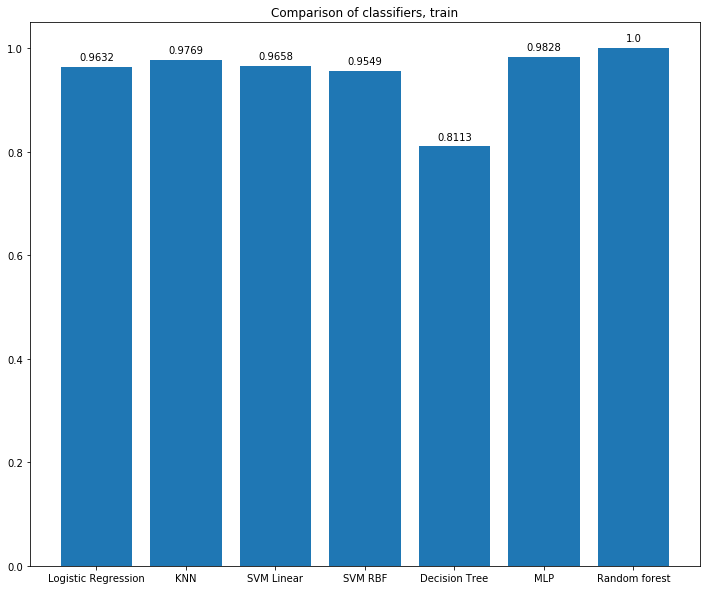

In [122]:
plot_scores(scores_train, "Comparison of classifiers, train")

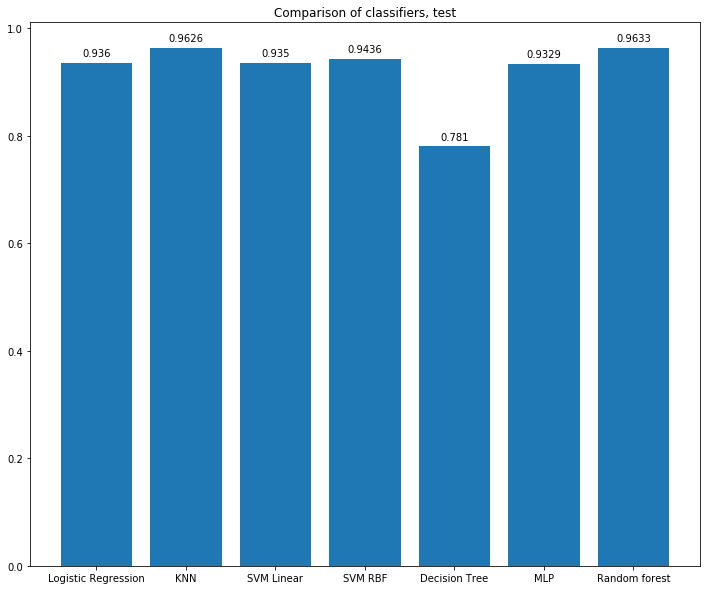

In [123]:
plot_scores(scores_test, "Comparison of classifiers, test")

Random Forest показал самый лучший результат.

3. Функция, подбирающая параметры числа деревьев и процента признаков в деревьях.

In [40]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {
    'n_estimators': range(100, 501, 100),
    'max_features': np.linspace(0.5, 1.0, 3)
}

search = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [41]:
search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

4. Почему качество классификации для класса spam выше, чем для класса notspam?

Тренировочная выборка несбалансированная: в ней количество примеров класса spam (4123) больше, чем notspam (2970). Более того, спамовые страницы скорее всего имеют больше общих признаков, чем неспамовые (Например: отсутствие разнообразия синонимов, длина заголовка, среднее число слов в предложении и т.д.)